# **TikTok Project**

**Regression modeling**


In this activity, I will be building a logistic regression model in Python. Logistic regression models help you estimate the probability of an outcome based on one or multiple independant variables. 

My completion of this project marks the end of my study of Module 5 - Regression Analysis, in Google's Advanced Data Analytics course.
<br/>

*This project has three parts:*

**Part 1:** EDA & Checking Model Assumptions

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results



# **Building a regression model**

### **1. Imports and loading**

In [62]:
# Importing packages for data manipulation
import pandas as pd
import numpy as np

# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Importing packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Loading the TikTok dataset:

In [61]:
data = pd.read_csv("tiktok_dataset.csv")

### **2a. Explore data with EDA**

The purposes of EDA before constructing a logistic regression model are

1) to identify data anomalies such as outliers and class imbalance that might affect the modeling;

2) to verify model assumptions such as no severe multicollinearity.

Inspecting the first five rows of the dataframe:

In [63]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Getting the number of rows and columns in the dataset.

In [4]:
data.shape

(19382, 12)

Getting the data types of the columns.

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Getting basic information about the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generating basic descriptive statistics about the dataset.

In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Checking for missing values

In [8]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Removing missing values

In [64]:
data = data.dropna(axis=0)

In [10]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Checking for duplicates

In [65]:
data.duplicated().sum()

0

There does not seem to be any duplicates.

<h3> Checking for and handling outliers:

Creating a boxplot to visualise distribution of video_duration_sec

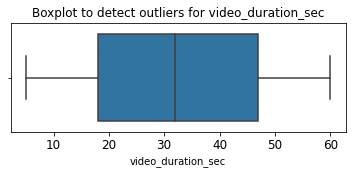

In [12]:

plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

Creating a boxplot to visualise distribution of video_view_count

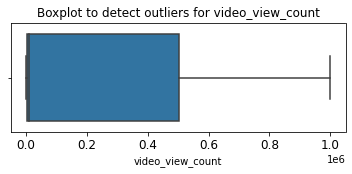

In [13]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

Creating a boxplot to visualise distribution of video_like_count

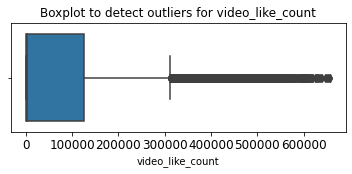

In [14]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

Creating a boxplot to visualise distribution of video_comment_count

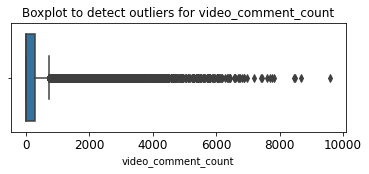

In [15]:
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

Setting upper and lower bounds, above or below 1.5 * the IQR, where anything outside the bounds is an outlier

In [66]:
# Calculating the 25th percentile
percentile25 = data["video_like_count"].quantile(0.25)
# Calculating the 75th percentile
percentile75 = data["video_like_count"].quantile(0.75)

# Calculating the Interquartile Range (IQR)
iqr = percentile75 - percentile25
# Defining the upper limit as 1.5 times the IQR above the 75th percentile
upper_limit = percentile75 + 1.5 * iqr
# Defining the lower limit as 1.5 times the IQR below the 25th percentile
lower_limit = percentile25 - 1.5 * iqr

# Removing rows where 'video_like_count' exceeds the upper limit or is below the lower limit
data = data[(data["video_like_count"] <= upper_limit) & (data["video_like_count"] >= lower_limit)]

Checking class balance

In [67]:
data["verified_status"].value_counts(normalize=True)

not verified    0.933287
verified        0.066713
Name: verified_status, dtype: float64

Approximately 93.3% of the dataset represents videos posted by unverified accounts and 6.7% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Using resampling to create class balance in the outcome variable

In [68]:
# Identifying data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsampling the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combining majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Displaying new class counts
data_upsampled["verified_status"].value_counts()

not verified    16200
verified        16200
Name: verified_status, dtype: int64

Getting the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length for videos posted by unverified accounts



In [69]:
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,88.846543
verified,83.974198


Extracting the length of each video_transcription_text and adding this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [20]:
# Extracting the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [21]:
# Displaying first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualising the distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts.

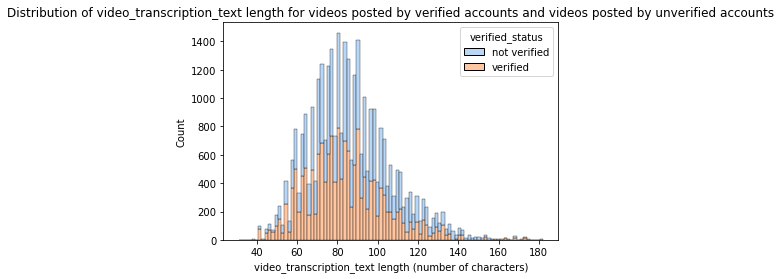

In [22]:
# Visualise the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Creating two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

### **2b. Examining correlations**

Coding a correlation matrix to help determine most correlated variables.

In [23]:
# Coding a correlation matrix to help determine most correlated variables
data_upsampled.corr()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.004293,-0.015409,-0.674643,-0.612870,-0.526747,-0.521165,-0.443281,-0.178651
video_id,-0.004293,1.000000,0.015522,0.006672,0.006126,0.002341,0.006729,0.004618,-0.013601
video_duration_sec,-0.015409,0.015522,1.000000,0.015706,0.007628,0.010361,0.011714,-0.001764,-0.008198
video_view_count,-0.674643,0.006672,0.015706,1.000000,0.795600,0.679594,0.667050,0.558007,0.229939
video_like_count,-0.612870,0.006126,0.007628,0.795600,1.000000,0.852264,0.836176,0.710257,0.199003
video_share_count,-0.526747,0.002341,0.010361,0.679594,0.852264,1.000000,0.705286,0.608476,0.164797
video_download_count,-0.521165,0.006729,0.011714,0.667050,0.836176,0.705286,1.000000,0.857942,0.169522
video_comment_count,-0.443281,0.004618,-0.001764,0.558007,0.710257,0.608476,0.857942,1.000000,0.138015
text_length,-0.178651,-0.013601,-0.008198,0.229939,0.199003,0.164797,0.169522,0.138015,1.000000


Visualising a correlation heatmap of the data.

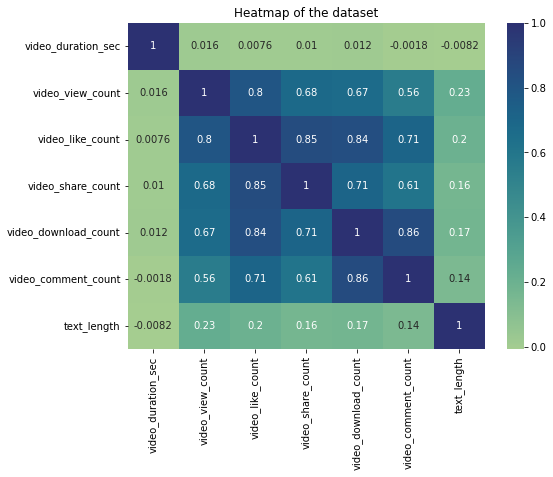

In [24]:
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

The above heatmap shows that the following pair of variables are strongly correlated: video_view_count and video_like_count (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, we could exclude video_like_count. Among the variables that quantify video metrics, we could keep video_view_count, video_share_count, video_download_count, and video_comment_count as features.

### **3a. Selecting variables**

Setting X and Y variables

In [25]:
# Selecting outcome variable
y = data_upsampled["verified_status"]

Selecting the features (independant variables).

In [26]:
# Selecting features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Displaying first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


video_like_count is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### **3b. Train-test split**

Splitting the data into training and testing sets.

In [27]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirming that the dimensions of the training and testing sets are in alignment.

In [28]:
# Getting shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24300, 7), (8100, 7), (24300,), (8100,))

- The number of features (`7`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`26826`) and testing (`8942`).

### **Encoding variables**

Checking the data types of the features.

In [29]:
# Checking data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [30]:
# Geting unique values in `claim_status`
X_train["claim_status"].unique()

array(['claim', 'opinion'], dtype=object)

In [31]:
# Geting unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'banned', 'under review'], dtype=object)

As shown above, the claim_status and author_ban_status features are each of data type object currently. In order to work with the implementations of models through sklearn, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encoding categorical features in the training set

In [32]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
21127,claim,active
7881,opinion,active
9788,opinion,active
3758,claim,active
19303,opinion,active


In [33]:
# Setting up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first')

In [34]:
# Fitting and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [35]:
# Getting feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [36]:
# Displaying first few rows of encoded training features
X_train_encoded

<24300x3 sparse matrix of type '<class 'numpy.float64'>'
	with 20111 stored elements in Compressed Sparse Row format>

In [70]:
# Placing encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded.toarray(), columns=X_encoder.get_feature_names_out())

# Displaying first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [71]:
# Displaying the first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21127,25,564382.0,92802.0,2926.0,515.0
7881,46,778.0,24.0,2.0,1.0
9788,35,9006.0,16.0,2.0,1.0
3758,32,720997.0,55011.0,2615.0,1243.0
19303,54,3629.0,338.0,31.0,10.0


In [73]:
# Concatenating `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,25,564382.0,92802.0,2926.0,515.0,0.0,0.0,0.0
1,46,778.0,24.0,2.0,1.0,1.0,0.0,0.0
2,35,9006.0,16.0,2.0,1.0,1.0,0.0,0.0
3,32,720997.0,55011.0,2615.0,1243.0,0.0,0.0,0.0
4,54,3629.0,338.0,31.0,10.0,1.0,0.0,0.0


Checking the data type of the outcome variable.

In [40]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [41]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

As shown above, the outcome variable is of data type object currently. One-hot encoding can be used to make this variable numeric.

Encoding categorical values of the outcome variable

In [42]:
# Setting up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [74]:
# Encoding the training outcome variable

#Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Displaying the encoded training outcome variable
y_train_final

array([1., 0., 0., ..., 0., 0., 0.])

### **3d. Model building**

Constructing a model and fit it to the training set.

In [75]:
# Constructing a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### **4a. Results and evaluation**

Evaluating the model

Encoding categorical features in the testing set

In [45]:
# Selecting the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Displaying first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
24676,opinion,active
23751,opinion,active
4832,claim,banned
30900,claim,banned
15298,opinion,active


In [46]:
# Transforming the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Displaying first few rows of encoded testing features
X_test_encoded

<8100x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6717 stored elements in Compressed Sparse Row format>

In [49]:
# Placing encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded.toarray(), columns=X_encoder.get_feature_names_out())

# Displaying first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0


In [50]:
# Displaying first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
24676,52,3940.0,69.0,3.0,1.0
23751,40,6121.0,901.0,25.0,7.0
4832,29,997358.0,17310.0,951.0,530.0
30900,37,307374.0,24478.0,288.0,163.0
15298,12,5867.0,3.0,0.0,0.0


In [76]:
# Concatenating `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)

X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Displaying first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,3940.0,69.0,3.0,1.0,1.0,0.0,0.0
1,40,6121.0,901.0,25.0,7.0,1.0,0.0,0.0
2,29,997358.0,17310.0,951.0,530.0,0.0,1.0,0.0
3,37,307374.0,24478.0,288.0,163.0,0.0,1.0,0.0
4,12,5867.0,3.0,0.0,0.0,1.0,0.0,0.0


Testing the logistic regression model by using the model to make predictions on the encoded testing set

In [52]:
# Using the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Displaying the predictions on the encoded testing set

In [53]:
# Displaying the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

Displaying the true labels of the testing set

In [54]:
# Displaying the true labels of the testing set
y_test

24676        verified
23751        verified
4832     not verified
30900        verified
15298    not verified
             ...     
22925        verified
18771        verified
5937     not verified
12580    not verified
15410    not verified
Name: verified_status, Length: 8100, dtype: object

Encoding the true labels of the testing set so it can be compared to the predictions.

In [77]:
# Encoding the testing outcome variable
#Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Displaying the encoded testing outcome variable
y_test_final

array([1., 1., 0., ..., 0., 0., 0.])

Confirming again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [78]:
# Getting shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((24300, 8), (24300,), (8100, 8), (8100,))

- The number of features (8) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (26826) and testing (8942).

### **4b. Visualising model results**

Creating a confusion matrix to visualise the results of the logistic regression model

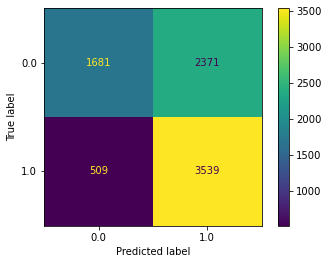

In [57]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plotting confusion matrix
log_disp.plot()

# Displaying plot
plt.show()

In [58]:
(3758+2044) / (3758 + 725 + 2044 + 2415)

0.6488481324088571

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [59]:
# Creating classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.77      0.41      0.54      4052
not verified       0.60      0.87      0.71      4048

    accuracy                           0.64      8100
   macro avg       0.68      0.64      0.62      8100
weighted avg       0.68      0.64      0.62      8100



The classification report above shows that the logistic regression model achieved a precision of 60% and a recall of 87%, and it achieved an accuracy of 64%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### **4c. Interpretting model coefficients**

In [60]:
# Getting the feature names from the model and the model coefficients (which represent log-odds ratios)
# Placing into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.007834
1,video_view_count,-0.000002
2,video_share_count,0.000003
3,video_download_count,-0.000228
4,video_comment_count,0.000307
5,claim_status_opinion,0.000345
6,author_ban_status_banned,-0.000015
7,author_ban_status_under review,-0.000011


### **4d. Conclusion**

Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 60% is less than ideal, but a recall of 87% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.